# Check GPU information

In [ ]:
!nvidia-smi

Thu Aug 18 07:02:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 建立 yolov5 所需的 datasets 路徑格式
%cd /content/
!mkdir datasets

!mkdir datasets/images
!mkdir datasets/labels
!mkdir datasets/annotations
!mkdir datasets/xmls

!mkdir datasets/images/train
!mkdir datasets/images/val
!mkdir datasets/images/test

!mkdir datasets/labels/train
!mkdir datasets/labels/val


!mkdir datasets/xmls/train
!mkdir datasets/xmls/val

!mkdir newdata

/content


In [ ]:
%cd /content/newdata/
from pathlib import Path
from torchvision.datasets.utils import download_file_from_google_drive, extract_archive
import gdown
import os

url = "https://drive.google.com/u/0/uc?id=1L7mD-J-zUfOTICTJLyVJL2zcF8n6g0t_&export=download"
gdown.download(url, 'dataset.rar', quiet=True)
!unrar x dataset.rar
!rm dataset.rar

import os
file_list = os.listdir('/content/newdata/')
for cls in file_list:
   print(cls)
   !unrar x $cls
   !rm $cls

   %cd /content/drive/MyDrive/yolov5/
   !python transferData.py

   %cd /content/newdata/
   !rm -r images
   !rm -r labels


Streaming output truncated to the last 5000 lines.
Extracting  labels/TreeTop_apple_juice092.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice093.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice094.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice095.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice096.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice097.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice098.xml                             99%  OK 
Extracting  labels/TreeTop_apple_juice099.xml                             99%  OK 
All OK
/content/drive/MyDrive/yolov5
TreeTop_apple_juice003
TreeTop_apple_juice021
TreeTop_apple_juice085
TreeTop_apple_juice020
TreeTop_apple_juice022
TreeTop_apple_juice088
TreeTop_apple_juice099
TreeTop_apple_j

In [ ]:
%cd /content/datasets/
!python Format.py

Streaming output truncated to the last 5000 lines.
1108
1477
AB_strawberry_yogurt_030
450
600
Ice_fire_061
791
835
Mine_Shine_black_tea_52
1108
1477
CC_lemon065
751
596
Kuang_soymilk_049
600
450
Kuang_fruit_milk_007
700
700
Lipton_strawberry_milk_tea_010
598
400
Kuang_Chocolate_milk_005
640
480
Chai_liwon_jp_green_tea041
640
480
Chai_liwon_jp_green_tea048
512
512
Lipton_chocolate_milk_tea_035
480
640
Family_Mart_lemon_honey_water_004
910
536
Sprite_044
400
400
Fanta_035
443
591
TeaTime_macha014
1000
750
Kuang_ricemilk_017
534
400
AppleSidra_018
640
480
Jasmine_Garden_honey_tea_009
962
1280
MinuteMaid_apple_soda_039
960
450
IMEI_milk_tea_040
400
400
Plum_green_tea_011
871
734
Oligo_water_020
1108
1477
Ovaltine_032
1108
1477
AB_original_yogurt_066
466
414
Bernachon_latte_014
1008
756
MinuteMaid_orange_75
1008
756
Ruisui_choco_milk_090
640
480
Mine_Shine_black_tea_10
1108
1477
AB_strawberry_yogurt_043
600
600
Sprite_032
1024
1024
Zhui_ze_005
715
806
Bernachon_hazelnut_027
640
480
Chai_liw

# Clone YOLOv5 code form [github](https://github.com/ultralytics/yolov5)

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import os
if os.path.exists("yolov5"):
  print("YOLOv5 code file had been cloned")
else:
  !git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!ls

YOLOv5 code file had been cloned
/content/drive/MyDrive/yolov5
CONTRIBUTING.md  hubconf.py  __pycache__       transferData.py	yolotxt2txt.py
data		 LICENSE     README.md	       tutorial.ipynb	yolov5x.pt
detect.py	 models      requirements.txt  utils
Dockerfile	 output.csv  runs	       val.py
export.py	 pt2onnx     train.py	       weights


# Install YOLOv5 third-party libraries

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# YOLOv5 Demo
* use pretrained model (COCO dataset)

In [ ]:
%cd /content/drive/MyDrive/yolov5/
!python detect.py --source /content/datasets/images/test/  --weights runs/train/exp35/weights/best.pt --conf 0.4

/content/drive/MyDrive/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/datasets/images/test/', update=False, view_img=False, weights=['runs/train/exp35/weights/best.pt'])
YOLOv5 🚀 2021-6-12 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7196851 parameters, 0 gra

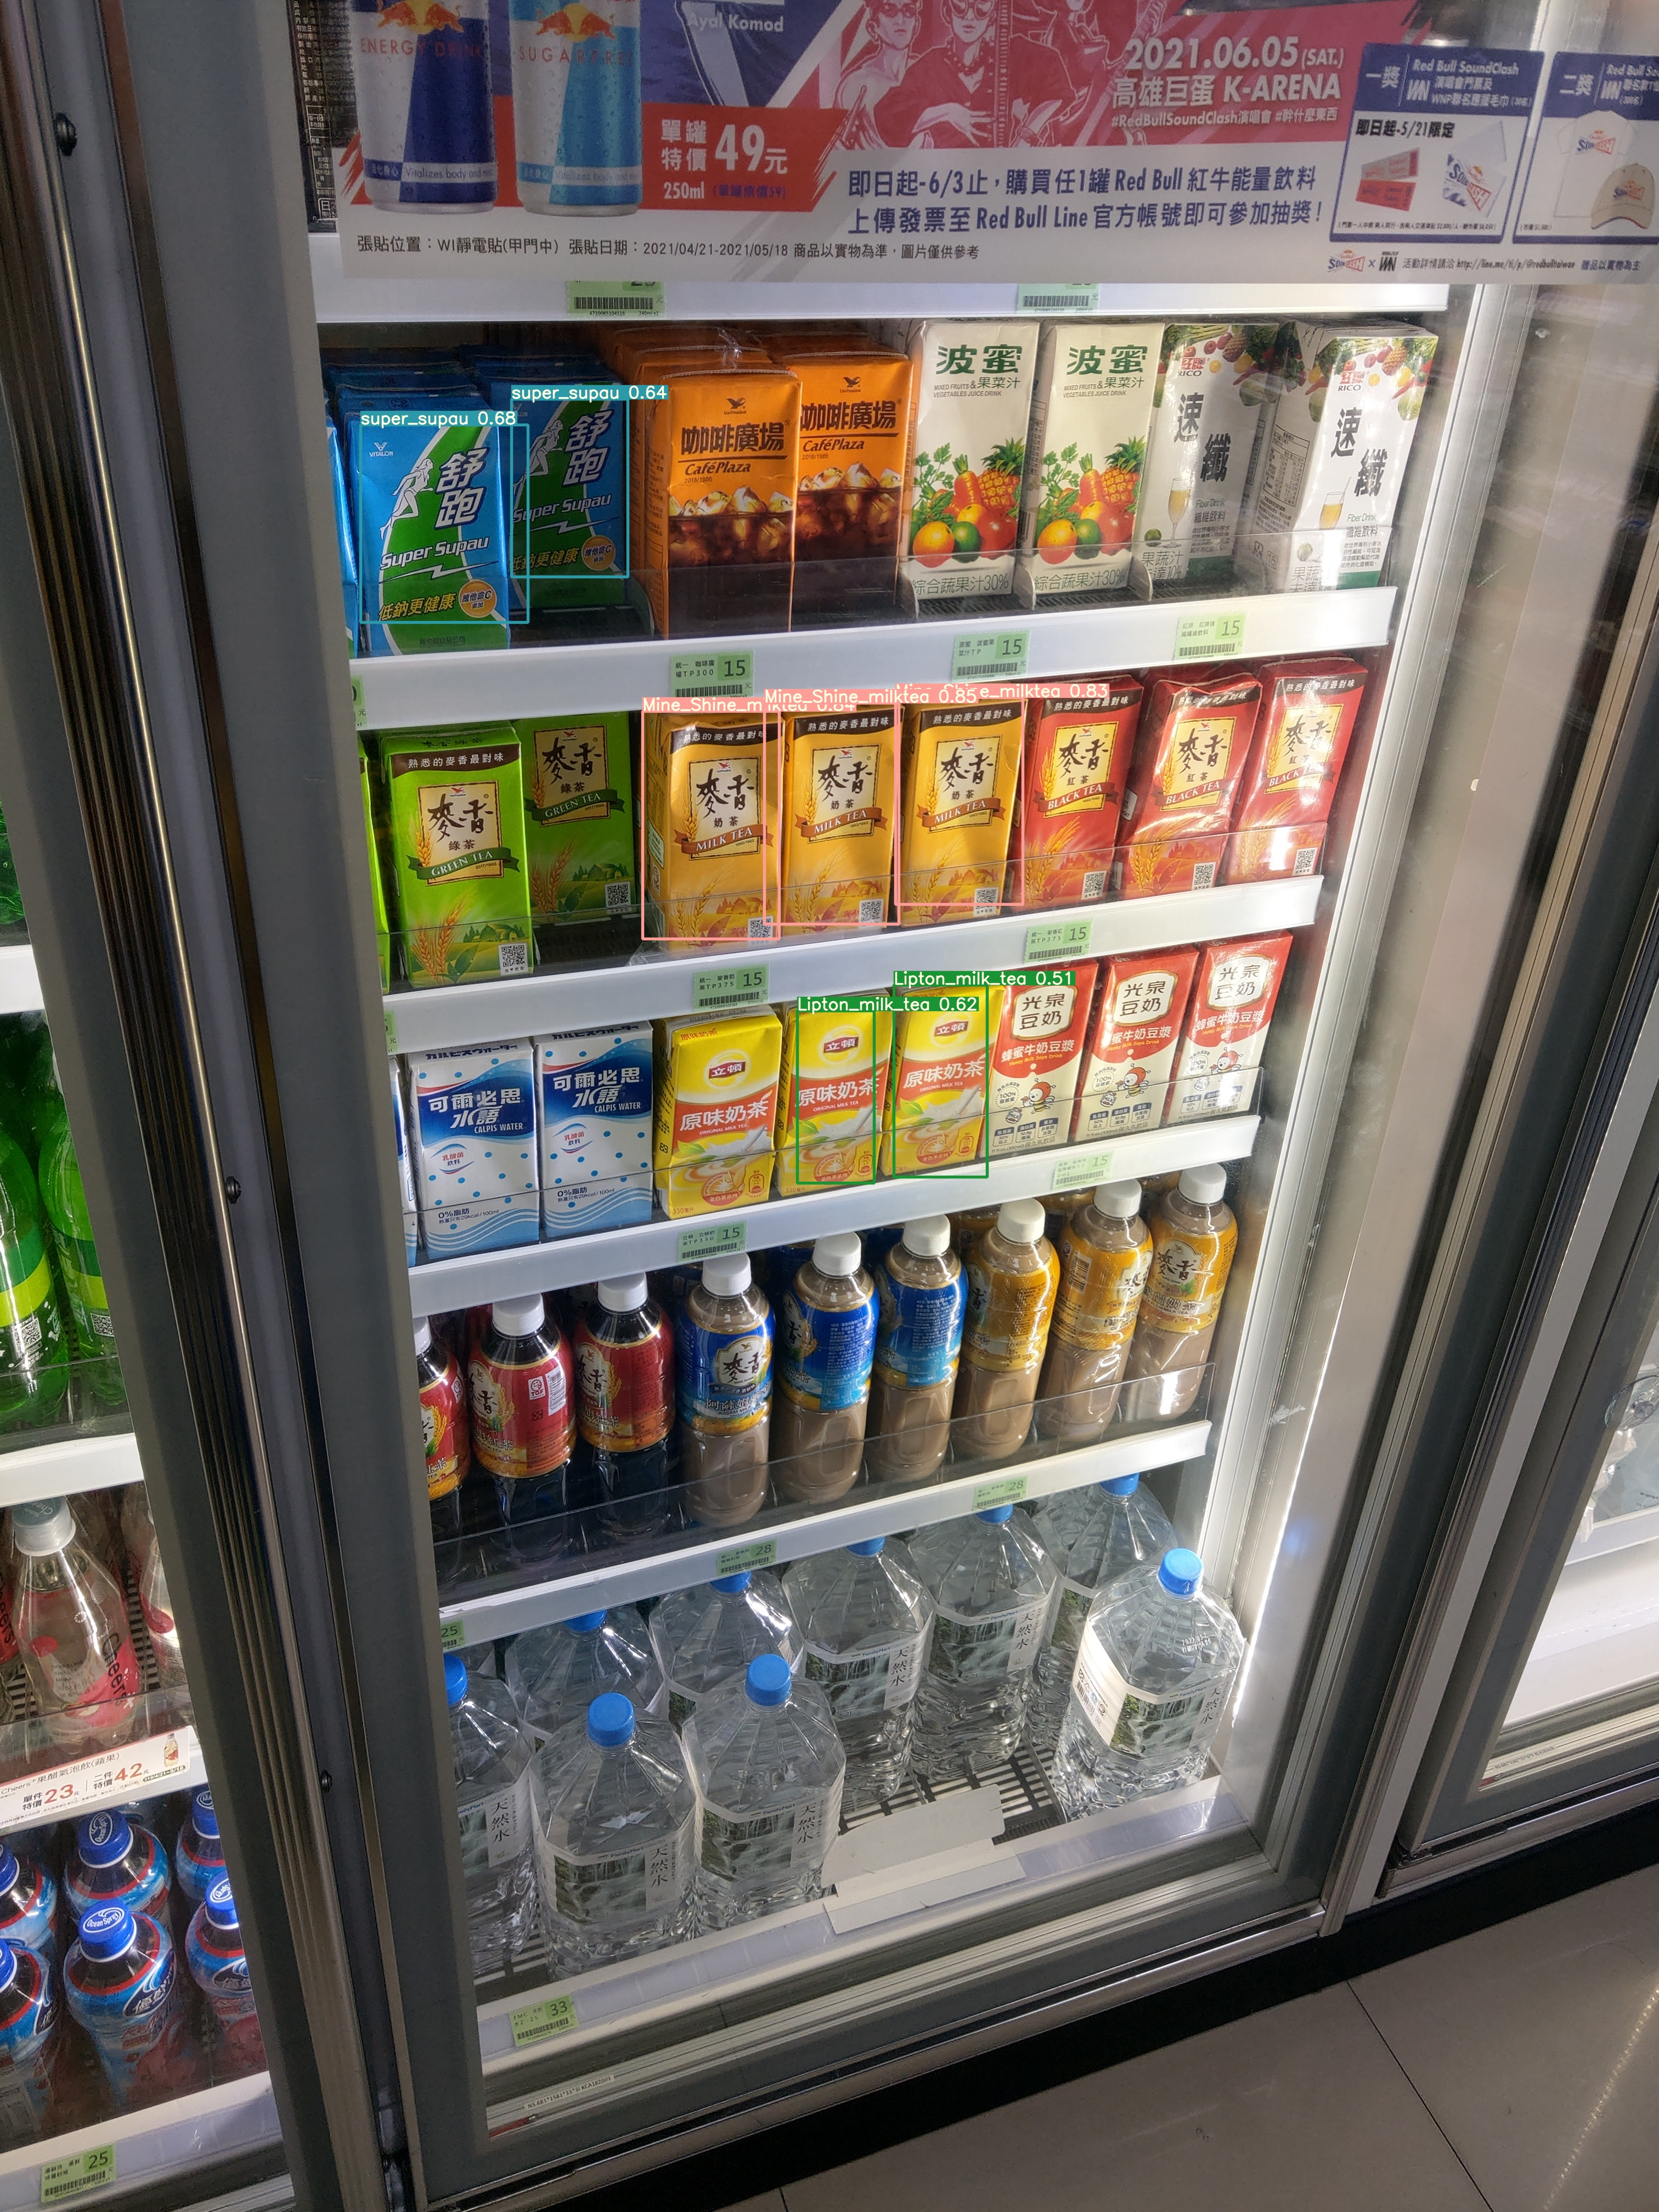

In [ ]:
from IPython.display import Image, display
display(Image('runs/detect/exp8/m8.jpg'))

# YOLOv5 train on custom data
* You can download YOLOv5 others pretrained models from [Yolov5 Github](https://github.com/ultralytics/yolov5/releases)
* You need to create your own .yaml at : yolov5/data/XXX.yaml

* Downlaod the custom data example from [Here](https://drive.google.com/file/d/1r-ZJFxqLffLxTQIf6tspcBprGjyaVi0N/view?usp=sharing)

* Training output model will be saved at : yolov5/runs/train/exp0/weights/last.pt
* More information [YOLOv5 Train-Custom-Data](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)

In [ ]:
%cd /content/drive/MyDrive/yolov5/
!python train.py --img 640 --batch 32 --epoch 300 --data /content/datasets/annotations/Product.yaml --weights weights/best.pt

/content/drive/MyDrive/yolov5
train: weights=weights/best.pt, cfg=, data=/content/datasets/annotations/Product.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=32, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
Resuming training from ./runs/train/exp9/weights/last.pt
YOLOv5 🚀 v6.0-31-g3d89798 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.001, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0

In [ ]:
%cd /content/drive/MyDrive/yolov5/
!python export.py --weights runs/train/exp9/weights/best.pt --batch 1 --include onnx

/content/drive/MyDrive/yolov5
export: data=data/coco128.yaml, weights=runs/train/exp9/weights/best.pt, imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=13, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.0-31-g3d89798 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPs

PyTorch: starting from runs/train/exp9/weights/best.pt (58.8 MB)

ONNX: starting export with onnx 1.10.2...
/content/drive/MyDrive/yolov5/models/yolo.py:60: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.grid[i].shape[2:4] != x[i].shape[2:4] or self.onnx_dynamic:
ONNX: export success, saved 